# Simulating lattice gauge theory with Rydberg atoms

In this example notebook, we will simulate a lattice gauge theory (LGD) with the Rydberg atoms

## Introduction 


## Adiabatic evolution

We begin by importing the necessary packages.

In [3]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt

from braket.ahs.atom_arrangement import AtomArrangement


from braket.ahs.time_series import TimeSeries
from braket.ahs.driving_field import DrivingField
from braket.ahs.shifting_field import ShiftingField
from braket.ahs.field import Field
from braket.ahs.pattern import Pattern
from braket.ahs.hamiltonian import Hamiltonian
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from utils import show_register, show_global_drive, show_final_avg_density, show_drive_and_shift

from braket.analog_hamiltonian_simulator.rydberg.rydberg_simulator import RydbergAtomSimulator

## Preparign the initial state for the LGT dynamics

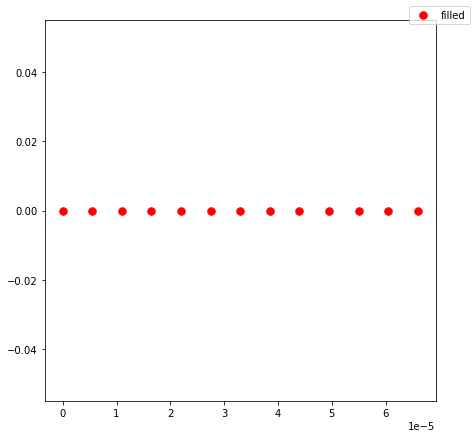

In [4]:
register = AtomArrangement()
separation = 5.5e-6  # in meters 
num_atoms = 13 # 4n+1

for k in range(num_atoms):
    register.add((k*separation, 0))
    
show_register(register)

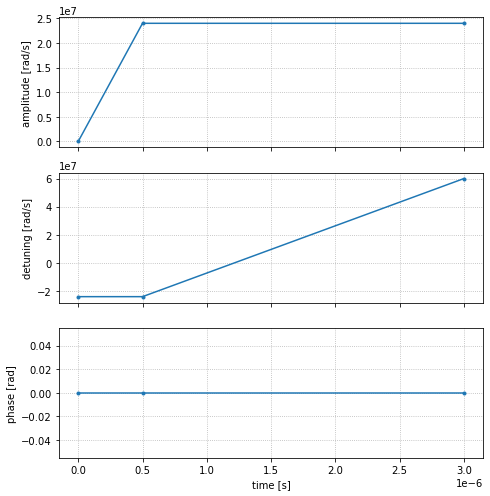

In [5]:
amplitude_min = 0       
amplitude_max = 24e6
detuning_min = -24e6
detuning_max = 60e6

# amplitude_max = 24e6/4
# detuning_min = -24e6/4
# detuning_max = 60e6/4

time_max = 3e-6
time_ramp = 5e-7

# time_points = [0, time_ramp, time_max - time_ramp, time_max]
# amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]
# detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]

time_points = [0, time_ramp, time_max, time_max]
amplitude_values = [amplitude_min, amplitude_max, amplitude_max]
detuning_values = [detuning_min, detuning_min, detuning_max]
phase_values = [0 for _ in range(len(time_points))]

amplitude = TimeSeries()
for t, v in zip(time_points, amplitude_values):
    amplitude.put(t, v)

detuning = TimeSeries()
for t, v in zip(time_points, detuning_values):
    detuning.put(t, v)

phase = TimeSeries()
for t, v in zip(time_points, phase_values):
    phase.put(t, v)

# Note: Since all attributes of QuEra Aquila's driving field are uniform,
#       we pass the TimeSeries objects directly to the constructor.
#       This will contruct braket.ahs.field.Field objects with uniform patterns for the attributes.
drive = DrivingField(
    amplitude=amplitude, 
    detuning=detuning, 
    phase=phase
)
show_global_drive(drive)

The input program is being validated.

10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   0.09s. Est. time left: 00:00:00:00
40.0%. Run time:   0.13s. Est. time left: 00:00:00:00
50.0%. Run time:   0.18s. Est. time left: 00:00:00:00
60.0%. Run time:   0.24s. Est. time left: 00:00:00:00
70.0%. Run time:   0.30s. Est. time left: 00:00:00:00
80.0%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.54s


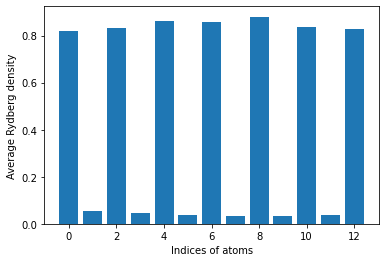

In [6]:
hamiltonian = Hamiltonian()
hamiltonian += drive

ahs_program = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=hamiltonian
)

ahs_program_ir = ahs_program.to_ir()

device = RydbergAtomSimulator()
result = device.run(ahs_program_ir, blockade_radius=separation, progress_bar=True)
show_final_avg_density(result)

## $Z_2$ order phase with a defect

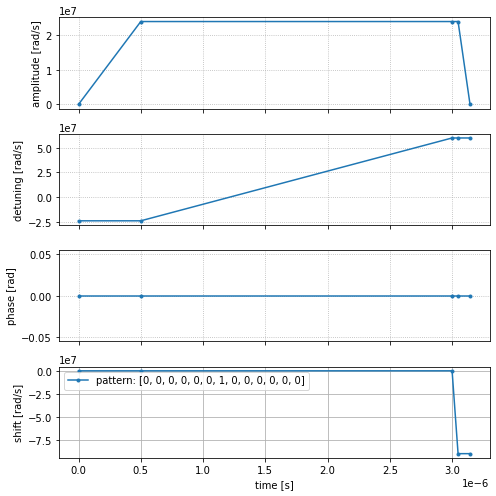

In [5]:
amplitude_min = 0       
amplitude_max = 24e6
detuning_min = -24e6
detuning_max = 60e6

time_max = 3e-6
time_ramp = 5e-7

max_shift_slew_rate = 1250000000000000
max_amplitude_slew_rate = 2.5e14
# time_ramp_2 = max((amplitude_max-amplitude_min)/max_amplitude_slew_rate, detuning_max/max_shift_slew_rate)
time_ramp_2 = detuning_max/max_shift_slew_rate
time_ramp_3 = (amplitude_max-amplitude_min)/max_amplitude_slew_rate

tq = 0. * pi/amplitude_max;
shift_value = -1.5*detuning_max
pattern_defect = [1 if idx==int(num_atoms/2) else 0 for idx in range(num_atoms)]

time_points = [0, time_ramp, time_max, time_max+time_ramp_2, time_max+time_ramp_2+tq, time_max+time_ramp_2+tq+time_ramp_3]
amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_max, amplitude_max, amplitude_min]
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max, detuning_max, detuning_max]

phase_values = [0 for _ in range(len(time_points))]

magnitude_values = [*[0 for _ in range(3)], shift_value, shift_value, shift_value]

amplitude = TimeSeries()
for t, v in zip(time_points, amplitude_values):
    amplitude.put(t, v)

detuning = TimeSeries()
for t, v in zip(time_points, detuning_values):
    detuning.put(t, v)

phase = TimeSeries()
for t, v in zip(time_points, phase_values):
    phase.put(t, v)

magnitude = TimeSeries()
for t, v in zip(time_points, magnitude_values):
    magnitude.put(t, v)

    
# Note: Since all attributes of QuEra Aquila's driving field are uniform,
#       we pass the TimeSeries objects directly to the constructor.
#       This will contruct braket.ahs.field.Field objects with uniform patterns for the attributes.
drive = DrivingField(
    amplitude=amplitude, 
    detuning=detuning, 
    phase=phase
)

shift = ShiftingField(Field(time_series=magnitude, pattern=Pattern(pattern_defect)))


show_drive_and_shift(drive, shift)



The input program is being validated.



/Users/maolinml/opt/anaconda3/lib/python3.9/site-packages/braket/analog_hamiltonian_simulator/rydberg/validators/field_validator_util.py:10: UserWarning: Value 3 (-90000000.0) in magnitude sequence outside the typical range [0, 125000000.0]. The values should  be specified in SI units.
  warnings.warn(


10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   0.08s. Est. time left: 00:00:00:00
40.0%. Run time:   0.12s. Est. time left: 00:00:00:00
50.0%. Run time:   0.16s. Est. time left: 00:00:00:00
60.0%. Run time:   0.21s. Est. time left: 00:00:00:00
70.0%. Run time:   0.27s. Est. time left: 00:00:00:00
80.0%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.46s


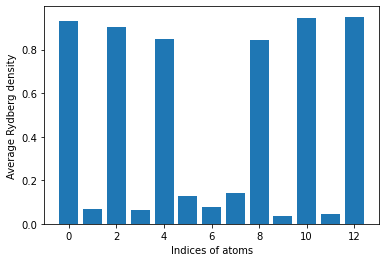

In [6]:
hamiltonian_defect = Hamiltonian()
hamiltonian_defect += drive 
hamiltonian_defect += shift

ahs_program_with_defect = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=hamiltonian_defect
)

ahs_program_with_defect_ir = ahs_program_with_defect.to_ir()

result_with_defect = device.run(ahs_program_with_defect_ir, blockade_radius=separation, progress_bar=True)
show_final_avg_density(result_with_defect)

## Propagation of particle-antiparticle pairs

In [7]:
result_with_defect = device.run(ahs_program_with_defect_ir, blockade_radius=separation, progress_bar=True, shots=0)

The input program is being validated.

10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   0.08s. Est. time left: 00:00:00:00
40.0%. Run time:   0.12s. Est. time left: 00:00:00:00
50.0%. Run time:   0.16s. Est. time left: 00:00:00:00
60.0%. Run time:   0.21s. Est. time left: 00:00:00:00
70.0%. Run time:   0.27s. Est. time left: 00:00:00:00
80.0%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.45s


NotImplementedError: Shot = 0 is not implemented yet